In [ ]:
from google.colab import drive
drive.mount("/content/drive")

Mounted at /content/drive


In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

%precision 3
%matplotlib inline

np.set_printoptions(precision=3)

pd.set_option('display.float_format', '{:.3f}'.format)

In [ ]:
data_path = '/content/drive/MyDrive/Python-Statistical-Analysis/python_stat_sample-master/data/'

In [ ]:
# 2장 데이터 ch2_scores_em.csv 파일을 불러오고, 인덱스 컬럼은 student number로 지정
df = pd.read_csv(data_path + 'ch2_scores_em.csv', index_col='student number')

# 데이터 프레임의 최상단 5개 행 출력
df.head()

,english,mathematics
student number,,
1,42,65
2,69,80
3,56,63
4,41,63
5,57,76


In [ ]:
# 'df' DataFrame에서 'english' 열을 선택하고, 그 열을 NumPy 배열로 변환합니다.
# [:10]를 사용하여 0부터 9번까지의 데이터를 선택합니다.
scores = np.array(df['english'])[:10]

# 생성한 'scores' 배열을 출력합니다.
scores

array([42, 69, 56, 41, 57, 48, 65, 49, 65, 58])

In [ ]:
# 'scores' 배열을 사용하여 'score' 열을 가지고 있는 DataFrame을 생성합니다.
scores_df = pd.DataFrame({'score': scores},
                         # 인덱스를 'A'부터 'J'까지의 문자로 설정하고,
                         # 인덱스 이름을 'student'로 지정합니다.
                         index=pd.Index(['A', 'B', 'C', 'D', 'E',
                                         'F', 'G', 'H', 'I', 'J' ],
                                        name='student'))
# 생성한 DataFrame을 출력합니다.
scores_df

,score
student,
A,42
B,69
C,56
D,41
E,57
F,48
G,65
H,49
I,65


In [ ]:
# 영어 점수의 평균
sum(scores) / len(scores)

55.0

In [ ]:
# Numpy를 사용하여 평균 구하기
np.mean(scores)

55.0

In [ ]:
# 'scores' 배열을 정렬하기 전에 먼저 'scores' 배열을 정의해야 합니다.
# 예를 들어, 다음과 같이 'scores' 배열을 정의할 수 있습니다.
# scores = np.array([87, 45, 92, 78, 60])

# 'scores' 배열을 오름차순으로 정렬하고, 정렬된 결과를 'sorted_scores' 변수에 저장합니다.
sorted_scores = np.sort(scores)
sorted_scores

array([41, 42, 48, 49, 56, 57, 58, 65, 65, 69])

In [ ]:
# 정렬된 점수 배열의 길이를 구합니다. 'n'은 데이터의 개수입니다.
n = len(sorted_scores)

# 데이터의 개수가 짝수인 경우:
if n % 2 == 0:
    m0 = sorted_scores[n//2 - 1]  # 중앙의 왼쪽 값(더 작은 값)을 'm0'에 저장합니다.
    m1 = sorted_scores[n//2]      # 중앙의 오른쪽 값(더 큰 값)을 'm1'에 저장합니다.
    median = (m0 + m1) / 2        # 중앙값은 이 두 값의 평균으로 계산됩니다.

# 데이터의 개수가 홀수인 경우
else:
    median = sorted_scores[(n+1)//2 - 1]  # 중앙값은 중앙에 위치한 값으로 계산됩니다.

print(n)
print(median)
# 'median' 변수에는 중앙값이 저장됩니다. 결과를 출력합니다.

10
56.5


In [ ]:
np.median(scores)

56.5

In [ ]:
# DataFrame이나 Series에서는 median 메서드로 구할 수 있습니다.
scores_df.median()

score    56.5
dtype: float64

In [ ]:
# .mode() 메서드를 사용하여 데이터에서 최빈값(mode)을 계산합니다.
pd.Series([1, 1, 1, 2, 2, 3]).mode()

0    1
dtype: int64

In [ ]:
pd.Series([1, 2, 3, 4, 5]).mode()

0    1
1    2
2    3
3    4
4    5
dtype: int64

In [ ]:
mean = np.mean(scores)
print(mean)

deviation = scores - mean
deviation

55.0


array([-13.,  14.,   1., -14.,   2.,  -7.,  10.,  -6.,  10.,   3.])

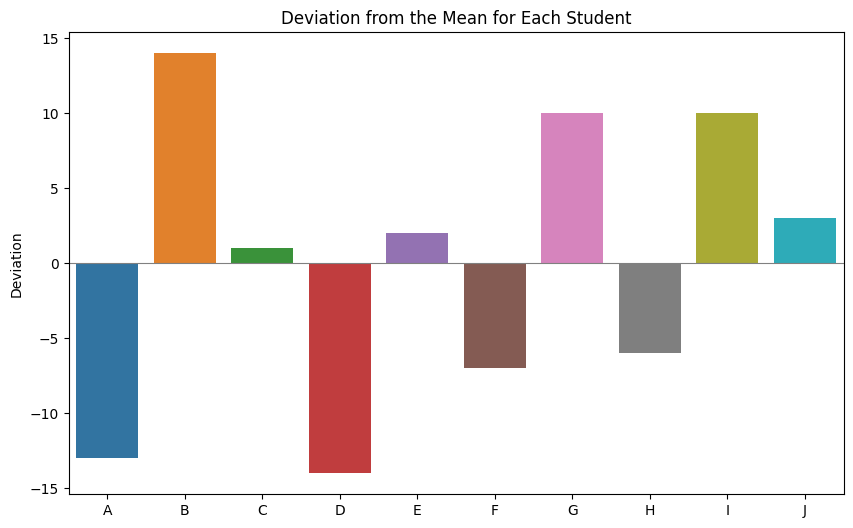

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

# 예시 데이터
students = ['A', 'B', 'C', 'D', 'E', 'F', 'G', 'H', 'I', 'J']

mean = np.mean(scores)
deviation = scores - mean

# 시각화
plt.figure(figsize=(10, 6))
sns.barplot(x = students, y = deviation)
plt.axhline(0, color='gray', linewidth=0.8)  # 평균에서의 차이를 나타내기 위한 기준선
plt.title('Deviation from the Mean for Each Student')
plt.ylabel('Deviation')
plt.show()

In [ ]:
another_scores = [50, 60, 58, 54, 51, 56, 57, 53, 52, 59]
another_mean = np.mean(another_scores)
print(another_mean)

another_deviation = another_scores - another_mean
another_deviation

55.0


array([-5.,  5.,  3., -1., -4.,  1.,  2., -2., -3.,  4.])

In [ ]:
# 편차의 평균을 계산
# 모든 편차를 합하면 상쇄되어 결과는 0이 나온다.
np.mean(deviation)

0.0

In [ ]:
np.mean(another_deviation)

0.0

In [ ]:
summary_df = scores_df.copy()
summary_df['deviation'] = deviation

# summary = 요약
summary_df

,score,deviation
student,,
A,42,-13.0
B,69,14.0
C,56,1.0
D,41,-14.0
E,57,2.0
F,48,-7.0
G,65,10.0
H,49,-6.0
I,65,10.0


In [ ]:
summary_df.mean()

score        55.0
deviation     0.0
dtype: float64

In [ ]:
# 편차의 각 요소 제곱 및 전부 더한 후 평균값 구하기
np.mean(deviation ** 2)

86.0

In [ ]:
# NumPy에서 분산을 구하는 방법
np.var(scores)

86.0

In [ ]:
# summary_df 편차에 제곱 열을 추가합시다.
summary_df['square of deviation'] = np.square(deviation)
summary_df

,score,deviation,square of deviation
student,,,
A,42,-13.0,169.0
B,69,14.0,196.0
C,56,1.0,1.0
D,41,-14.0,196.0
E,57,2.0,4.0
F,48,-7.0,49.0
G,65,10.0,100.0
H,49,-6.0,36.0
I,65,10.0,100.0


In [ ]:
# 1. 데이터셋 'scores'에 대한 모집단 표준 분산 계산
# 2. 모집단 표준 분산에서 표준 편차 계산
np.sqrt(np.var(scores, ddof=0))

9.273618495495704

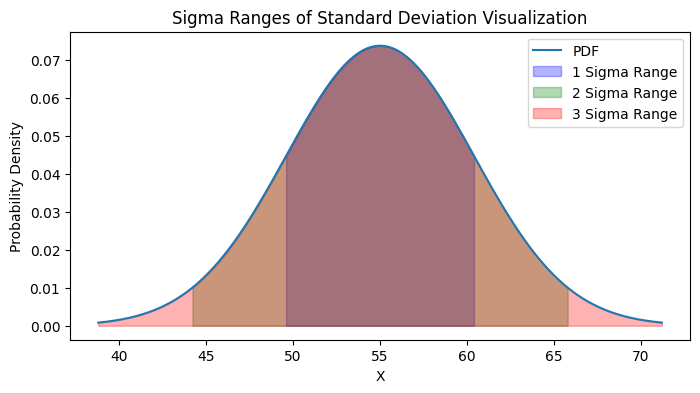

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

# 데이터 생성
mu = 55  # 평균
sigma = 5.402545696243577  # 표준편차

# X 축 범위 설정
x = np.linspace(mu - 3 * sigma, mu + 3 * sigma, 1000)
# 확률 밀도 함수 (PDF) 계산
pdf = (1 / (sigma * np.sqrt(2 * np.pi))) * np.exp(-0.5 * ((x - mu) / sigma) ** 2)

# 그래프 생성
plt.figure(figsize=(8, 4))
plt.plot(x, pdf, label='PDF')

# 1 시그마 범위를 채우는 코드 (평균 ±1 표준편차 범위)
# 약 68.27%의 데이터가 이 범위 내에 있습니다.
plt.fill_between(x, pdf, 0, where=[(mu - sigma <= xi <= mu + sigma) for xi in x], alpha=0.3, color='blue', label='1 Sigma Range')

# 2 시그마 범위를 채우는 코드 (평균 ±2 표준편차 범위)
# 약 95.45%의 데이터가 이 범위 내에 있습니다.
plt.fill_between(x, pdf, 0, where=[(mu - 2 * sigma <= xi <= mu + 2 * sigma) for xi in x], alpha=0.3, color='green', label='2 Sigma Range')

# 3 시그마 범위를 채우는 코드 (평균 ±3 표준편차 범위)
# 약 99.73%의 데이터가 이 범위 내에 있습니다.
plt.fill_between(x, pdf, 0, where=[(mu - 3 * sigma <= xi <= mu + 3 * sigma) for xi in x], alpha=0.3, color='red', label='3 Sigma Range')

# 그래프 스타일 및 레이블 설정 (영어로 수정)
plt.xlabel('X')
plt.ylabel('Probability Density')
plt.title('Sigma Ranges of Standard Deviation Visualization')
plt.legend()

# 그래프 표시
plt.grid(False)
plt.show()

In [ ]:
print(np.max(scores))
print(np.min(scores))

69
41


In [ ]:
# 범위 = 데이터내의 최대값 - 데이터내의 최소값
Range = np.max(scores) - np.min(scores)
print(Range)

28


In [ ]:
scores_Q1 = np.percentile(scores, 25)
scores_Q3 = np.percentile(scores, 75)
scores_IQR = scores_Q3 - scores_Q1
scores_IQR

15.0

In [ ]:
pd.Series(scores).describe()

count    10.000000
mean     55.000000
std       9.775252
min      41.000000
25%      48.250000
50%      56.500000
75%      63.250000
max      69.000000
dtype: float64

In [ ]:
# 점수에서 평균을 뺀 후, 표준편차로 나눠 z-점수 계산
z = (scores - np.mean(scores)) / np.std(scores)
z

array([-1.402,  1.51 ,  0.108, -1.51 ,  0.216, -0.755,  1.078, -0.647,
        1.078,  0.323])

In [ ]:
z_mean = np.mean(z)
z_std = np.std(z, ddof=0)
print(z_mean)
print(z_std)
print("Mean: {:.3f}, Std: {:.3f}".format(z_mean, z_std))

-1.6653345369377347e-17
0.9999999999999999
Mean: -0.000, Std: 1.000


In [ ]:
z = 50 + 10 * (scores - np.mean(scores)) / np.std(scores)
z

array([35.982, 65.097, 51.078, 34.903, 52.157, 42.452, 60.783, 43.53 ,
       60.783, 53.235])

In [ ]:
scores_df['deviation value'] = z
scores_df

,score,deviation value
student,,
A,42,35.982
B,69,65.097
C,56,51.078
D,41,34.903
E,57,52.157
F,48,42.452
G,65,60.783
H,49,43.530
I,65,60.783


In [ ]:
# 50명의 영어 점수 array
english_scores = np.array(df['english'])

#Series로 변환하여 describe를 표시
pd.Series(english_scores).describe()

count   50.000
mean    58.380
std      9.800
min     37.000
25%     54.000
50%     57.500
75%     65.000
max     79.000
dtype: float64

In [ ]:
# 'english_scores'의 데이터를 0부터 100까지의 범위로 10개의 구간으로 히스토그램 생성
# 'freq'에는 각 구간의 빈도수(Count=학생수)가 저장됨
freq, _ = np.histogram(english_scores, bins=10, range=(0, 100))
freq

array([ 0,  0,  0,  2,  8, 16, 18,  6,  0,  0])

In [ ]:
# 0 ~ 10, 10 ~ 20, ... 이라는 문자열 리스트를 작성
freq_class = [f'{i}~{i+10}' for i in range(0, 100, 10)]

# freq_class를 인덱스로 DataFrame을 작성
freq_dist_df = pd.DataFrame({'frequency': freq},
                            index=pd.Index(freq_class, name='class'))

# freq: frequency (빈도)
# dist: distribution (분포)
# df: DataFrame (데이터 프레임)

freq_dist_df

,frequency
class,
0~10,0
10~20,0
20~30,0
30~40,2
40~50,8
50~60,16
60~70,18
70~80,6
80~90,0


In [ ]:
class_value = [(i+(i+10))//2 for i in range(0, 100, 10)]
class_value

[5, 15, 25, 35, 45, 55, 65, 75, 85, 95]

In [ ]:
# 각 구간의 빈도수를 전체 빈도수로 나누어 상대 빈도(상대 도수)를 계산
rel_freq = freq / freq.sum()

print(rel_freq.sum())
print(np.sum(rel_freq))
print(rel_freq)

1.0
1.0
[0.   0.   0.   0.04 0.16 0.32 0.36 0.12 0.   0.  ]


In [ ]:
# 상대 빈도의 누적 합(누적 상대 도수)을 계산
cum_rel_freq = np.cumsum(rel_freq)
cum_rel_freq

array([0.  , 0.  , 0.  , 0.04, 0.2 , 0.52, 0.88, 1.  , 1.  , 1.  ])

In [ ]:
# 각 구간의 대표값을 'class value' 열로 추가
freq_dist_df['class value'] = class_value

# 상대 도수를 'relative frequency' 열로 추가
freq_dist_df['relative frequency'] = rel_freq

# 누적 상대 도수를 'cumulative relative frequency' 열로 추가
freq_dist_df['cumulative relative frequency'] = cum_rel_freq

# DataFrame의 열 순서를 재정렬
freq_dist_df = freq_dist_df[['class value', 'frequency', 'relative frequency', 'cumulative relative frequency']]

freq_dist_df

,class value,frequency,relative frequency,cumulative relative frequency
class,,,,
0~10,5,0,0.000,0.000
10~20,15,0,0.000,0.000
20~30,25,0,0.000,0.000
30~40,35,2,0.040,0.040
40~50,45,8,0.160,0.200
50~60,55,16,0.320,0.520
60~70,65,18,0.360,0.880
70~80,75,6,0.120,1.000
80~90,85,0,0.000,1.000


In [ ]:
# 'frequency' 열에서 최대 빈도수를 가진 행의 'class value' 값을 추출
freq_dist_df.loc[freq_dist_df['frequency'].idxmax(), 'class value']

65

In [ ]:
# matplotlib 라이브러리를 임포트
import matplotlib.pyplot as plt

# Jupyter Notebook에서 그래프를 출력할 수 있게 하는 설정
%matplotlib inline

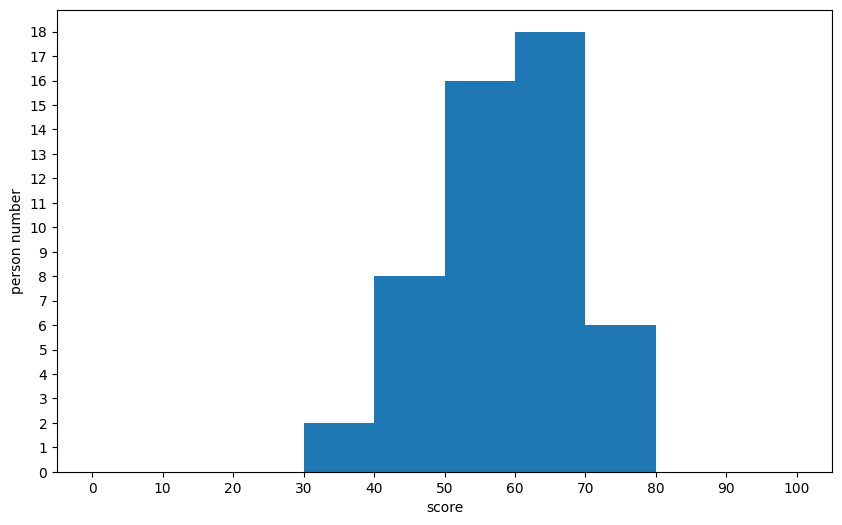

In [61]:
# 캔버스를 생성
# figsize로 가로·세로 크기를 지정
fig = plt.figure(figsize=(10, 6))

# 캔버스 위에 그래프를 그리기 위한 영역을 지정
# 인수는 영역을 1x1개 지정, 하나의 영역에 그린다는 것을 의미
ax = fig.add_subplot(111)

# 계급수를 10으로 하여 히스토그램을 그림
freq, _, _ = ax.hist(english_scores, bins=10, range=(0, 100))

# X축에 레이블 부여
ax.set_xlabel('score')

# Y축에 레이블 부여
ax.set_ylabel('person number')

# X축을 0, 10, 20, ..., 100 눈금으로 구분
ax.set_xticks(np.linspace(0, 100, 10+1))

# Y축을 0, 1, 2, ...의 눈금으로 구분
ax.set_yticks(np.arange(0, freq.max()+1))

# 그래프 표시
plt.show()

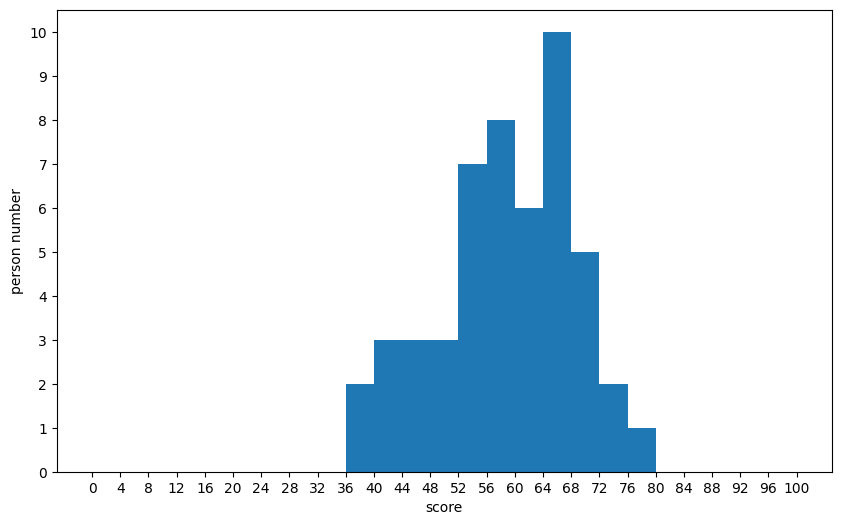

In [64]:
# 캔버스를 생성하고 가로·세로 크기를 지정
fig = plt.figure(figsize=(10, 6))

# 캔버스 위에 그래프를 그리기 위한 영역을 지정
# 인수는 영역을 1x1개 지정, 하나의 영역에 그린다는 것을 의미
ax = fig.add_subplot(111)

# 계급수를 25로 하여 히스토그램을 그림
# english_scores는 데이터 배열이며, 범위를 0부터 100까지로 지정
freq, _, _ = ax.hist(english_scores, bins=25, range=(0, 100))

# X축에 레이블 부여
ax.set_xlabel('score')

# Y축에 레이블 부여
ax.set_ylabel('person number')

# X축 눈금 설정:
# 0부터 100까지의 범위에서 25+1개의 눈금을 설정합니다.
# np.linspace(0, 100, 25+1)은 0부터 100까지를 25개의 동일한 간격으로 나눈 배열을 생성합니다.
# 이것은 히스토그램의 계급(bin) 경계를 나타냅니다.
# 따라서 X축 눈금은 0, 4, 8, 12, ..., 100으로 설정됩니다.
ax.set_xticks(np.linspace(0, 100, 25+1))

# Y축 눈금 설정:
# Y축의 눈금은 0부터 히스토그램의 최대 빈도(freq)까지의 값을 설정합니다.
# np.arange(0, freq.max()+1)은 0부터 freq의 최댓값까지의 값을 생성합니다.
# 이것은 Y축에 히스토그램의 개수를 표시하기 위한 눈금을 나타냅니다.
# 예를 들어, 히스토그램에서 최대 빈도가 10인 경우, Y축 눈금은 0, 1, 2, ..., 10으로 설정됩니다.
ax.set_yticks(np.arange(0, freq.max()+1))

# 그래프 표시
plt.show()

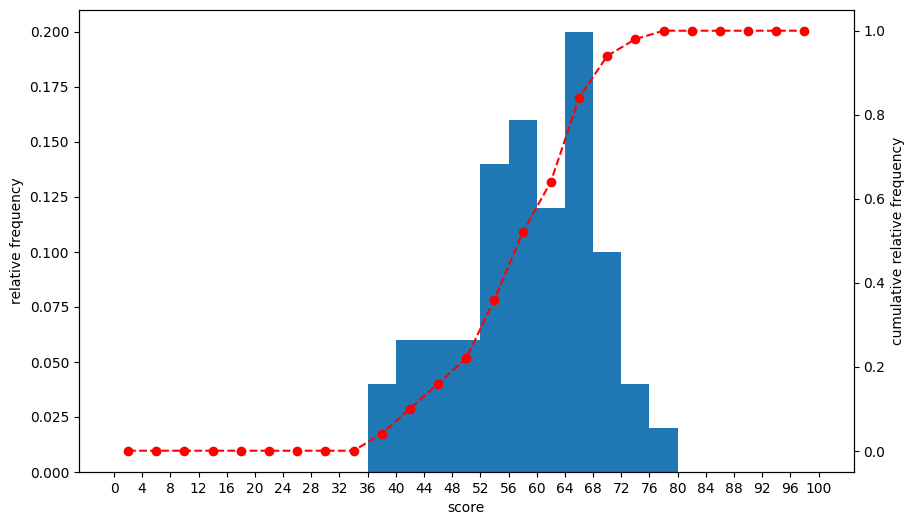

In [66]:
# 캔버스를 생성하고 가로·세로 크기를 지정
fig = plt.figure(figsize=(10, 6))

# 캔버스 위에 그래프를 그리기 위한 영역을 지정
ax1 = fig.add_subplot(111)

# Y축의 스케일이 다른 그래프를 ax1과 동일한 영역에 생성
ax2 = ax1.twinx()

# 히스토그램을 그리기 위한 상대도수 계산을 위해 weights를 설정
# weights를 사용하여 데이터의 수로 나눠주면 상대도수가 계산됩니다.
weights = np.ones_like(english_scores) / len(english_scores)

# 상대도수의 히스토그램을 그림
# english_scores는 데이터 배열이며, 범위를 0부터 100까지로 지정
# weights를 사용하여 상대도수를 계산합니다.
rel_freq, _, _ = ax1.hist(english_scores
                          , bins=25
                          , range=(0, 100)
                          , weights=weights)

# 상대도수를 누적하여 계산합니다.
cum_rel_freq = np.cumsum(rel_freq)

# 각 계급(bin)의 중간값(class_value)을 계산합니다.
class_value = [(i+(i+4))//2 for i in range(0, 100, 4)]

# 꺾은선 그래프를 그립니다.
# ls를 ' -- '로 설정하여 점선 스타일
# marker를 'o'로 설정하여 데이터 점을 표시합니다.
# color를 'red'로 설정하여 빨간색으로 지정합니다.
ax2.plot(class_value
         , cum_rel_freq
         , ls='--'
         , marker='o'
         , color='red')

# 꺾은선 그래프의 눈금선을 제거합니다.
ax2.grid(visible=False)

# X축에 레이블을 설정합니다.
ax1.set_xlabel('score')

# 왼쪽 Y축(상대도수)에 레이블을 설정합니다.
ax1.set_ylabel('relative frequency')

# 오른쪽 Y축(누적 상대도수)에 레이블을 설정합니다.
ax2.set_ylabel('cumulative relative frequency')

# X축 눈금을 설정합니다. 0부터 100까지를 25+1개의 눈금으로 설정합니다.
ax1.set_xticks(np.linspace(0, 100, 25+1))

# 그래프를 표시합니다.
plt.show()


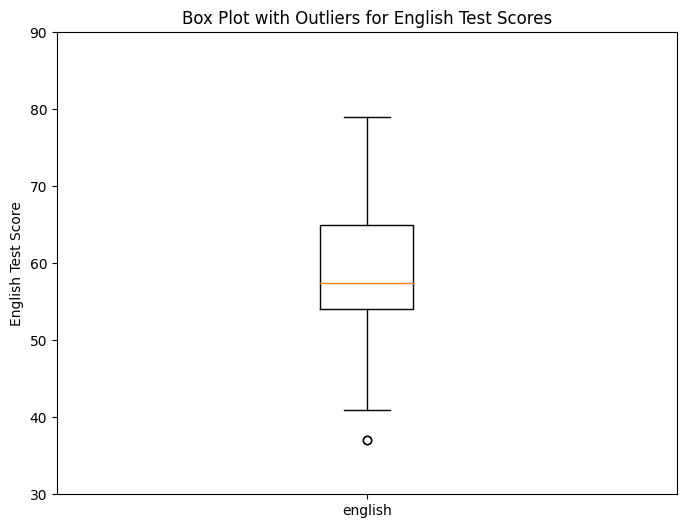

In [74]:
data = df['english']

# 데이터의 1/4, 1/2, 3/4 지점의 값을 계산합니다.
Q1 = data.quantile(0.25)
Q3 = data.quantile(0.75)

# IQR을 계산합니다.
IQR = Q3 - Q1

# 이상값의 경계를 계산합니다. (이 부분은 계산만 하고 그래프에 직접 이상값을 그리지 않으므로 생략해도 됩니다.)
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

# 상자 그림을 그립니다.
plt.figure(figsize=(8, 6))
plt.boxplot(data, vert=True, labels=['english'], whis=1.5) # whis를 1.5로 설정하여 IQR의 1.5배만큼을 이상값으로 설정

# y축의 눈금을 설정합니다.
plt.yticks(range(30, 91, 10))

plt.ylabel('English Test Score')
plt.title('Box Plot with Outliers for English Test Scores')
plt.show()

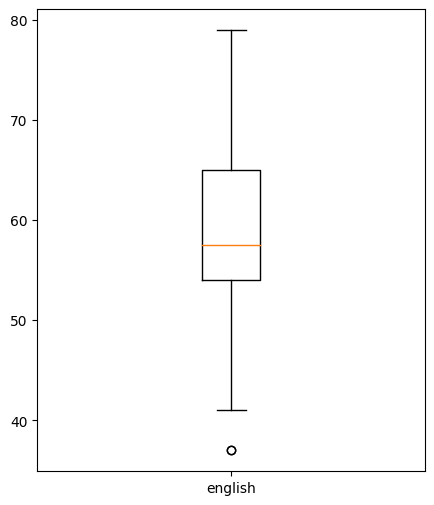

In [73]:
fig = plt.figure(figsize=(5, 6))
ax = fig.add_subplot(111)
ax.boxplot(english_scores, labels=['english'])

plt.show()